In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [2]:
df = pd.read_csv('train.csv')
df.head(20)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
print (len(df.columns))
print (df.columns)

81
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [4]:
missing_values = df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [5]:
# There are a total of 1460 rows and 81 columns
df.shape

(1460, 81)

In [6]:
# Linear Feet of Street connected to the Property (Numerical Variable with 259 missing values) -- NA assumes there is 0 Linear Feet of Street (Fill with 0) 
df['LotFrontage'].value_counts() 


LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [7]:
# This returns Gravel / Pavement and has 1306 missing values. Drop this variable
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [8]:
# Masonry Veneer Type -  872 missing values. None means No Type (Fill with NT - None then One Hot Encode]
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


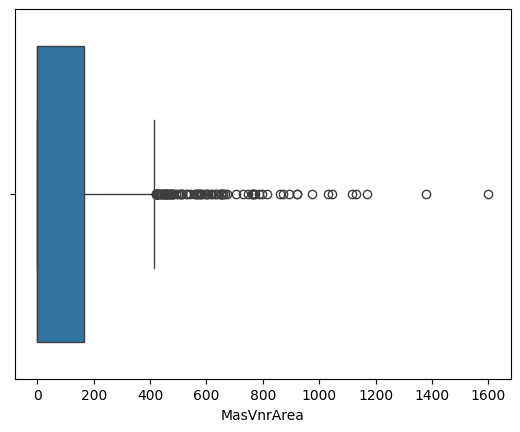

In [9]:
# MasVnrArea refers to Masonry Veneer Area in Square Feet (Has 8 Missing Values. Fill 0)
sns.boxplot(df, x='MasVnrArea')
print (df['MasVnrArea'].describe())

In [10]:
# This refers to Evaluation of Height of the Basement which returns Categorical Variable. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtQual'].value_counts() 

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [11]:
# Evaluates general condition of basement -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 37 Missing Values) 
df['BsmtCond'].value_counts() 

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [12]:
# Refers to Walkouts or Garden Level Walls. -- NA means No Basement (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtExposure'].value_counts() 

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [13]:
# Rating of Basement Finished Area. Missing Values are because there are no Basements. (Fill NB -- No Basement and One Hot Encode. 37 Missing Values)
df['BsmtFinType1'].value_counts() 

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [14]:
# Rating of Basement Finished Area (If multiple types) -- NA means No Basement. (Fill NB -- No Basement and One Hot Encode, 38 Missing Values)
df['BsmtFinType2'].value_counts() 

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [15]:
# Fireplace Quality -- NA means No Fireplace (Fill with NF - No Fireplace and One Hot Encode, 690 missing values)
df['FireplaceQu'].value_counts() 

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [16]:
# Garage Location -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [17]:
# Year that Garage was built. -- NA means No Year bc No Garage. Can we just fill with 0? Or delete the rows ? 
df['GarageYrBlt'].value_counts() 

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [18]:
# Interior Finish of the Garage. NA means No Garage. (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageFinish'].value_counts() 

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [19]:
# Garage Quality -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 missing values)
df['GarageQual'].value_counts() 

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [20]:
# Garage Condition -- NA means No Garage (Fill with NG - No Garage and One Hot Encode, 81 Missing Values)
df['GarageCond'].value_counts() 

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [21]:
# Pool Quality -- NA means No Pool (1453 Missing Values, Consider removing if not significant. Otherwise Fill with NP - No Pool, One Hot Encode)
df['PoolQC'].value_counts() 

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [22]:
# Fence Quality -- NA means No Fence (1179 Missing Values, Consider removing if not significant. Otherwise Fill with NF - No Fence, One Hot Encode)
df['Fence'].value_counts() 

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [23]:
# Miscellaneous Features not covered in other categories. (1406 Missing Values) Consider removing if not significant. Otherwise Fill with NF - No Features.
df['MiscFeature'].value_counts() 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [24]:
# df[df['Electrical'] == 'NA']
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [25]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [26]:
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [27]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [28]:
# Fillna fills all missing values for Train dataset df with appropriate values. 
df['LotFrontage'].fillna(value=0, inplace=True)
df['Alley'].fillna(value='No Alley', inplace=True)
df['MasVnrType'].fillna(value='NT', inplace=True)
df['MasVnrArea'].fillna(value=0, inplace=True)
df['BsmtQual'].fillna(value='NB', inplace=True)
df['BsmtCond'].fillna(value='NB', inplace=True)
df['BsmtExposure'].fillna(value='NB', inplace=True)
df['BsmtFinType1'].fillna(value='NB', inplace=True)
df['BsmtFinType2'].fillna(value='NB', inplace=True)
df['FireplaceQu'].fillna(value='NF', inplace=True)
df['GarageType'].fillna(value='NG', inplace=True)
df['GarageYrBlt'].fillna(value='NG', inplace=True)
df['GarageFinish'].fillna(value='NG', inplace=True)
df['GarageQual'].fillna(value='NG', inplace=True)
df['GarageCond'].fillna(value='NG', inplace=True)
df['PoolQC'].fillna(value='NP', inplace=True)
df['Fence'].fillna(value='NF', inplace=True)
df['MiscFeature'].fillna(value='NoFeature', inplace=True)
df['Electrical'].fillna(value='SBrkr', inplace=True) 

C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_7592\1075943620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(value=0, inplace=True)
C:\Users\guojiefoo\AppData\Local\Temp\ipykernel_7592\1075943620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [29]:
missing_values = df.isnull().sum()
# Pip Install Jinja2 module first
missing_values[missing_values > 0].to_frame().style.background_gradient(cmap='viridis')

,0


In [30]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [31]:
numeric_data = df.select_dtypes(include=[np.number, np.float64, np.float32])
categorical_data = df.select_dtypes(exclude=[np.number])

print (numeric_data.shape[1])
print (categorical_data.shape[1]) 
categorical_data = categorical_data.astype('str')
categorical_data.columns 

37
44


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

# apply label encoder on categorical feature columns
categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))

categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,89,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,62,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,87,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,84,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,86,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,85,2,5,5,2,3,4,1,8,4
1456,3,1,1,3,3,0,4,0,14,2,...,64,3,5,5,2,3,2,1,8,4
1457,3,1,1,3,3,0,4,0,6,2,...,29,2,5,5,2,3,0,3,8,4
1458,3,1,1,3,3,0,4,0,12,2,...,36,3,5,5,2,3,4,1,8,4


In [33]:
filled_data = pd.concat([numeric_data, categorical_data], axis=1)
print (filled_data.columns)
filled_data['Total Bathrooms'] = filled_data['FullBath'] + 0.5 * filled_data['HalfBath'] + filled_data['BsmtFullBath'] + 0.5 * filled_data['BsmtHalfBath']
filled_data['Total Square Feet'] = filled_data['TotalBsmtSF'] + filled_data['GrLivArea'] + filled_data['GarageArea'] + filled_data['WoodDeckSF'] + filled_data['OpenPorchSF'] + filled_data['EnclosedPorch'] + filled_data['3SsnPorch'] + filled_data['ScreenPorch'] + filled_data['PoolArea']
filled_data['Overall House Age'] = (df['YrSold']) - (df['YearBuilt'])
filled_data['Rebirthed House Age'] = (df['YrSold']) - (df['YearRemodAdd'])
filled_data
# filled_data['Total Bathrooms']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,3,4,1,8,4,3.5,3175,5,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2,3,4,1,8,4,2.5,3282,31,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,3,4,1,8,4,3.5,3356,7,6
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2,3,4,1,8,0,2.0,3422,91,36
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,3,4,1,8,4,3.5,4455,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,2,3,4,1,8,4,2.5,3100,8,7
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,2,3,2,1,8,4,3.0,4464,32,22
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2,3,0,3,8,4,2.0,3804,69,4
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,2,3,4,1,8,4,2.0,2874,60,14


In [34]:
# Set Display Options to show all rows and columns 
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False) 

correlation_matrix = filled_data.corr(method='pearson', numeric_only = True)
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Total Bathrooms,Total Square Feet,Overall House Age,Rebirthed House Age
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.006096,0.008916,-0.002855,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,0.038675,-0.022562,-0.034694,-0.042847,0.051971,0.001689,0.029826,0.008514,0.047668,0.007223,-0.025879,0.016616,0.045877,0.042120,0.002157,0.009821,0.037632,-0.004432,-0.001064,0.003765,-0.007822,-0.004807,-0.004626,0.001955,-0.008379,0.005971,-0.033928,-0.000399,-0.038103,0.019773,-0.005806,0.004540,-0.001170,0.012724,0.022049
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.035900,-0.024969,0.099430,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,-0.017161,-0.003254,0.058126,-0.081702,-0.017905,-0.065218,0.006437,0.037025,0.048009,0.020760,-0.101774,0.051945,0.010129,0.003711,0.050200,0.133138,0.105910,-0.028806,-0.038571,-0.045895,-0.059925,-0.005221,0.086360,-0.046881,0.012464,-0.024940,0.151048,-0.088023,-0.028746,-0.041968
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624,-0.051250,-0.025107,-0.044618,0.163570,-0.066957,-0.043535,0.029069,-0.041567,0.069402,-0.041813,-0.024004,-0.239093,-0.036300,0.121161,0.020938,0.090523,0.095601,0.094128,-0.152801,0.045593,0.046889,-0.124846,-0.002392,-0.059939,0.069487,0.017978,0.007434,-0.098241,-0.011683,0.011495,-0.170205,0.013666,-0.118782,-0.083816,0.037448,-0.081052,-0.005169,0.019600,0.016838,-0.134610,-0.009611,-0.016789,-0.043808,0.054221,0.083124,0.263653,-0.037327,-0.079482
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.034452,-0.197131,-0.029676,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.077054,0.149837,0.004256,-0.003930,-0.008122,-0.057275,0.015160,-0.011081,-0.061495,0.016715,-0.152436,-0.057081,-0.056425,0.028158,0.004212,0.049755,0.

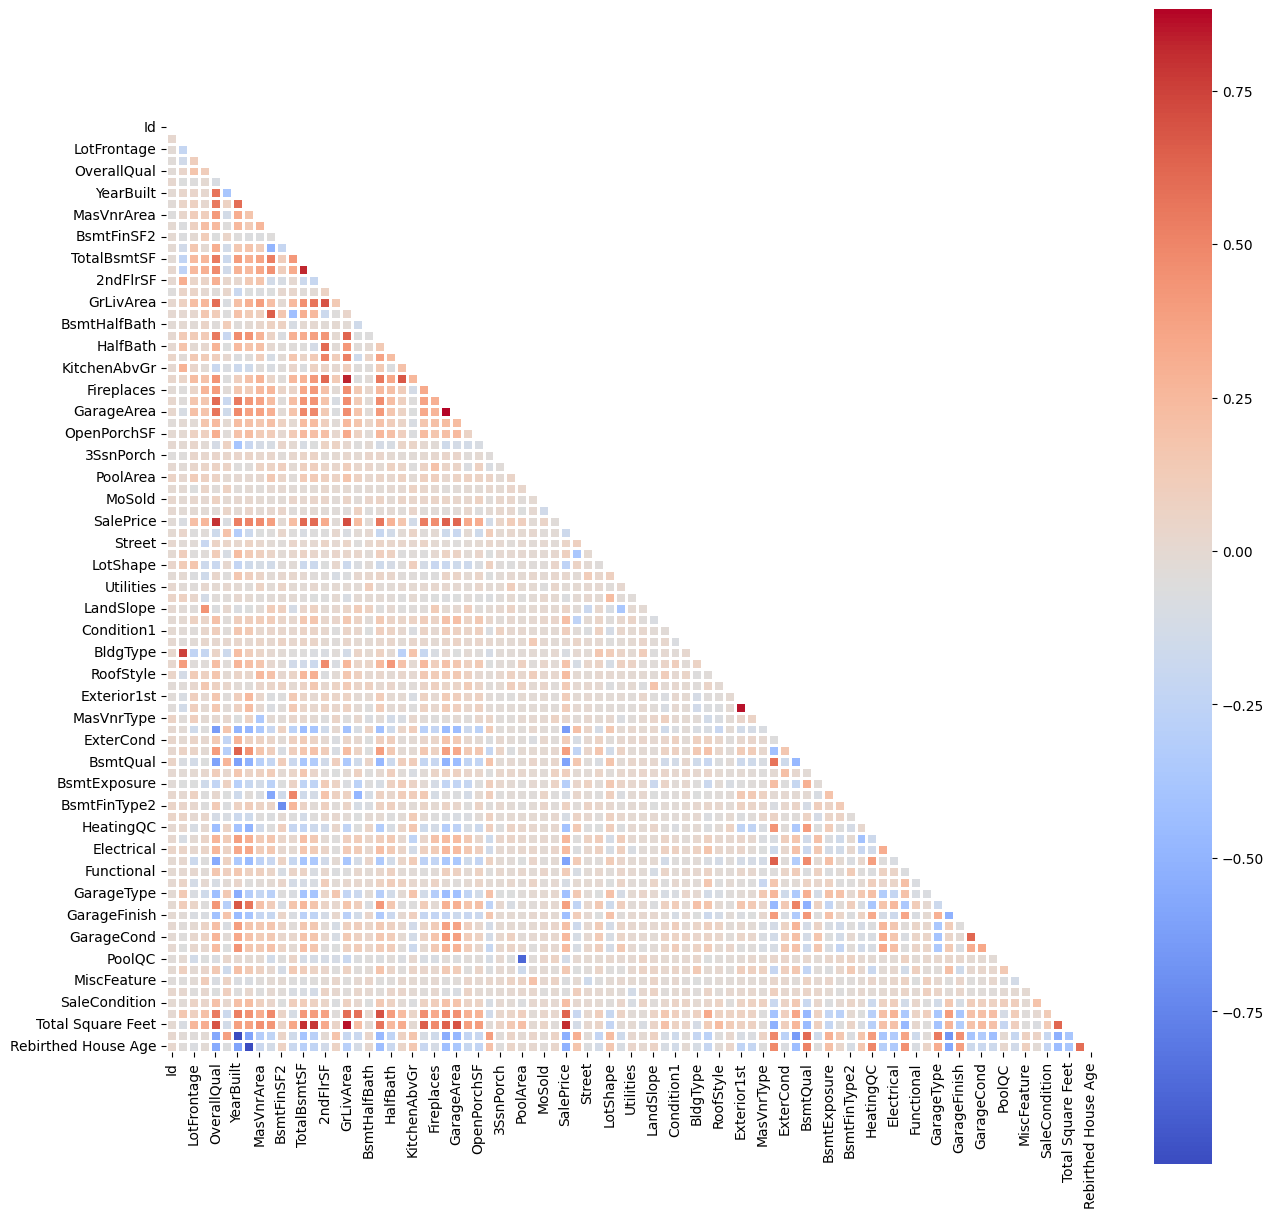

In [35]:
# Create a Mask to filter out top half of correlation matrix
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, mask=mask, linewidths=1.0)

plt.show() 

In [95]:
#  'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'Foundation', 'HeatingQC', 'GarageType', 'BsmtQual','ExterQual','KitchenQual','GarageYrBlt',
# 'Overall House Age',
y = filled_data['SalePrice']
X = filled_data[[
       'OverallQual', 'MasVnrArea', 
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 
       'Total Bathrooms', 'Rebirthed House Age', 'Total Square Feet']]
print (X.shape)
print (y.shape)

(1460, 9)
(1460,)


In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score
from sklearn.metrics import root_mean_squared_error, root_mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [97]:
# Create a VIF DataFrame 
vif = pd.DataFrame() 
vif['Feature'] = X.columns 
# Calculate VIF Scores for each feature prior to any preprocessing performed
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Overall Quality + Exterior Quality -- Correlation 
# Total Square Feet + 1st Square Feet + GrLivArea -- Correlation 
# Overall House Age / Rebirthed House Age + Year Built + Year RemodAdd -- Perfect Correlation
print (vif)



               Feature  VIF Factor
0          OverallQual   30.070174
1           MasVnrArea    1.657196
2         TotRmsAbvGrd   27.632500
3           Fireplaces    2.499704
4         GarageFinish    3.943699
5           GarageCars   12.748961
6      Total Bathrooms   15.855537
7  Rebirthed House Age    2.779963
8    Total Square Feet   38.009500


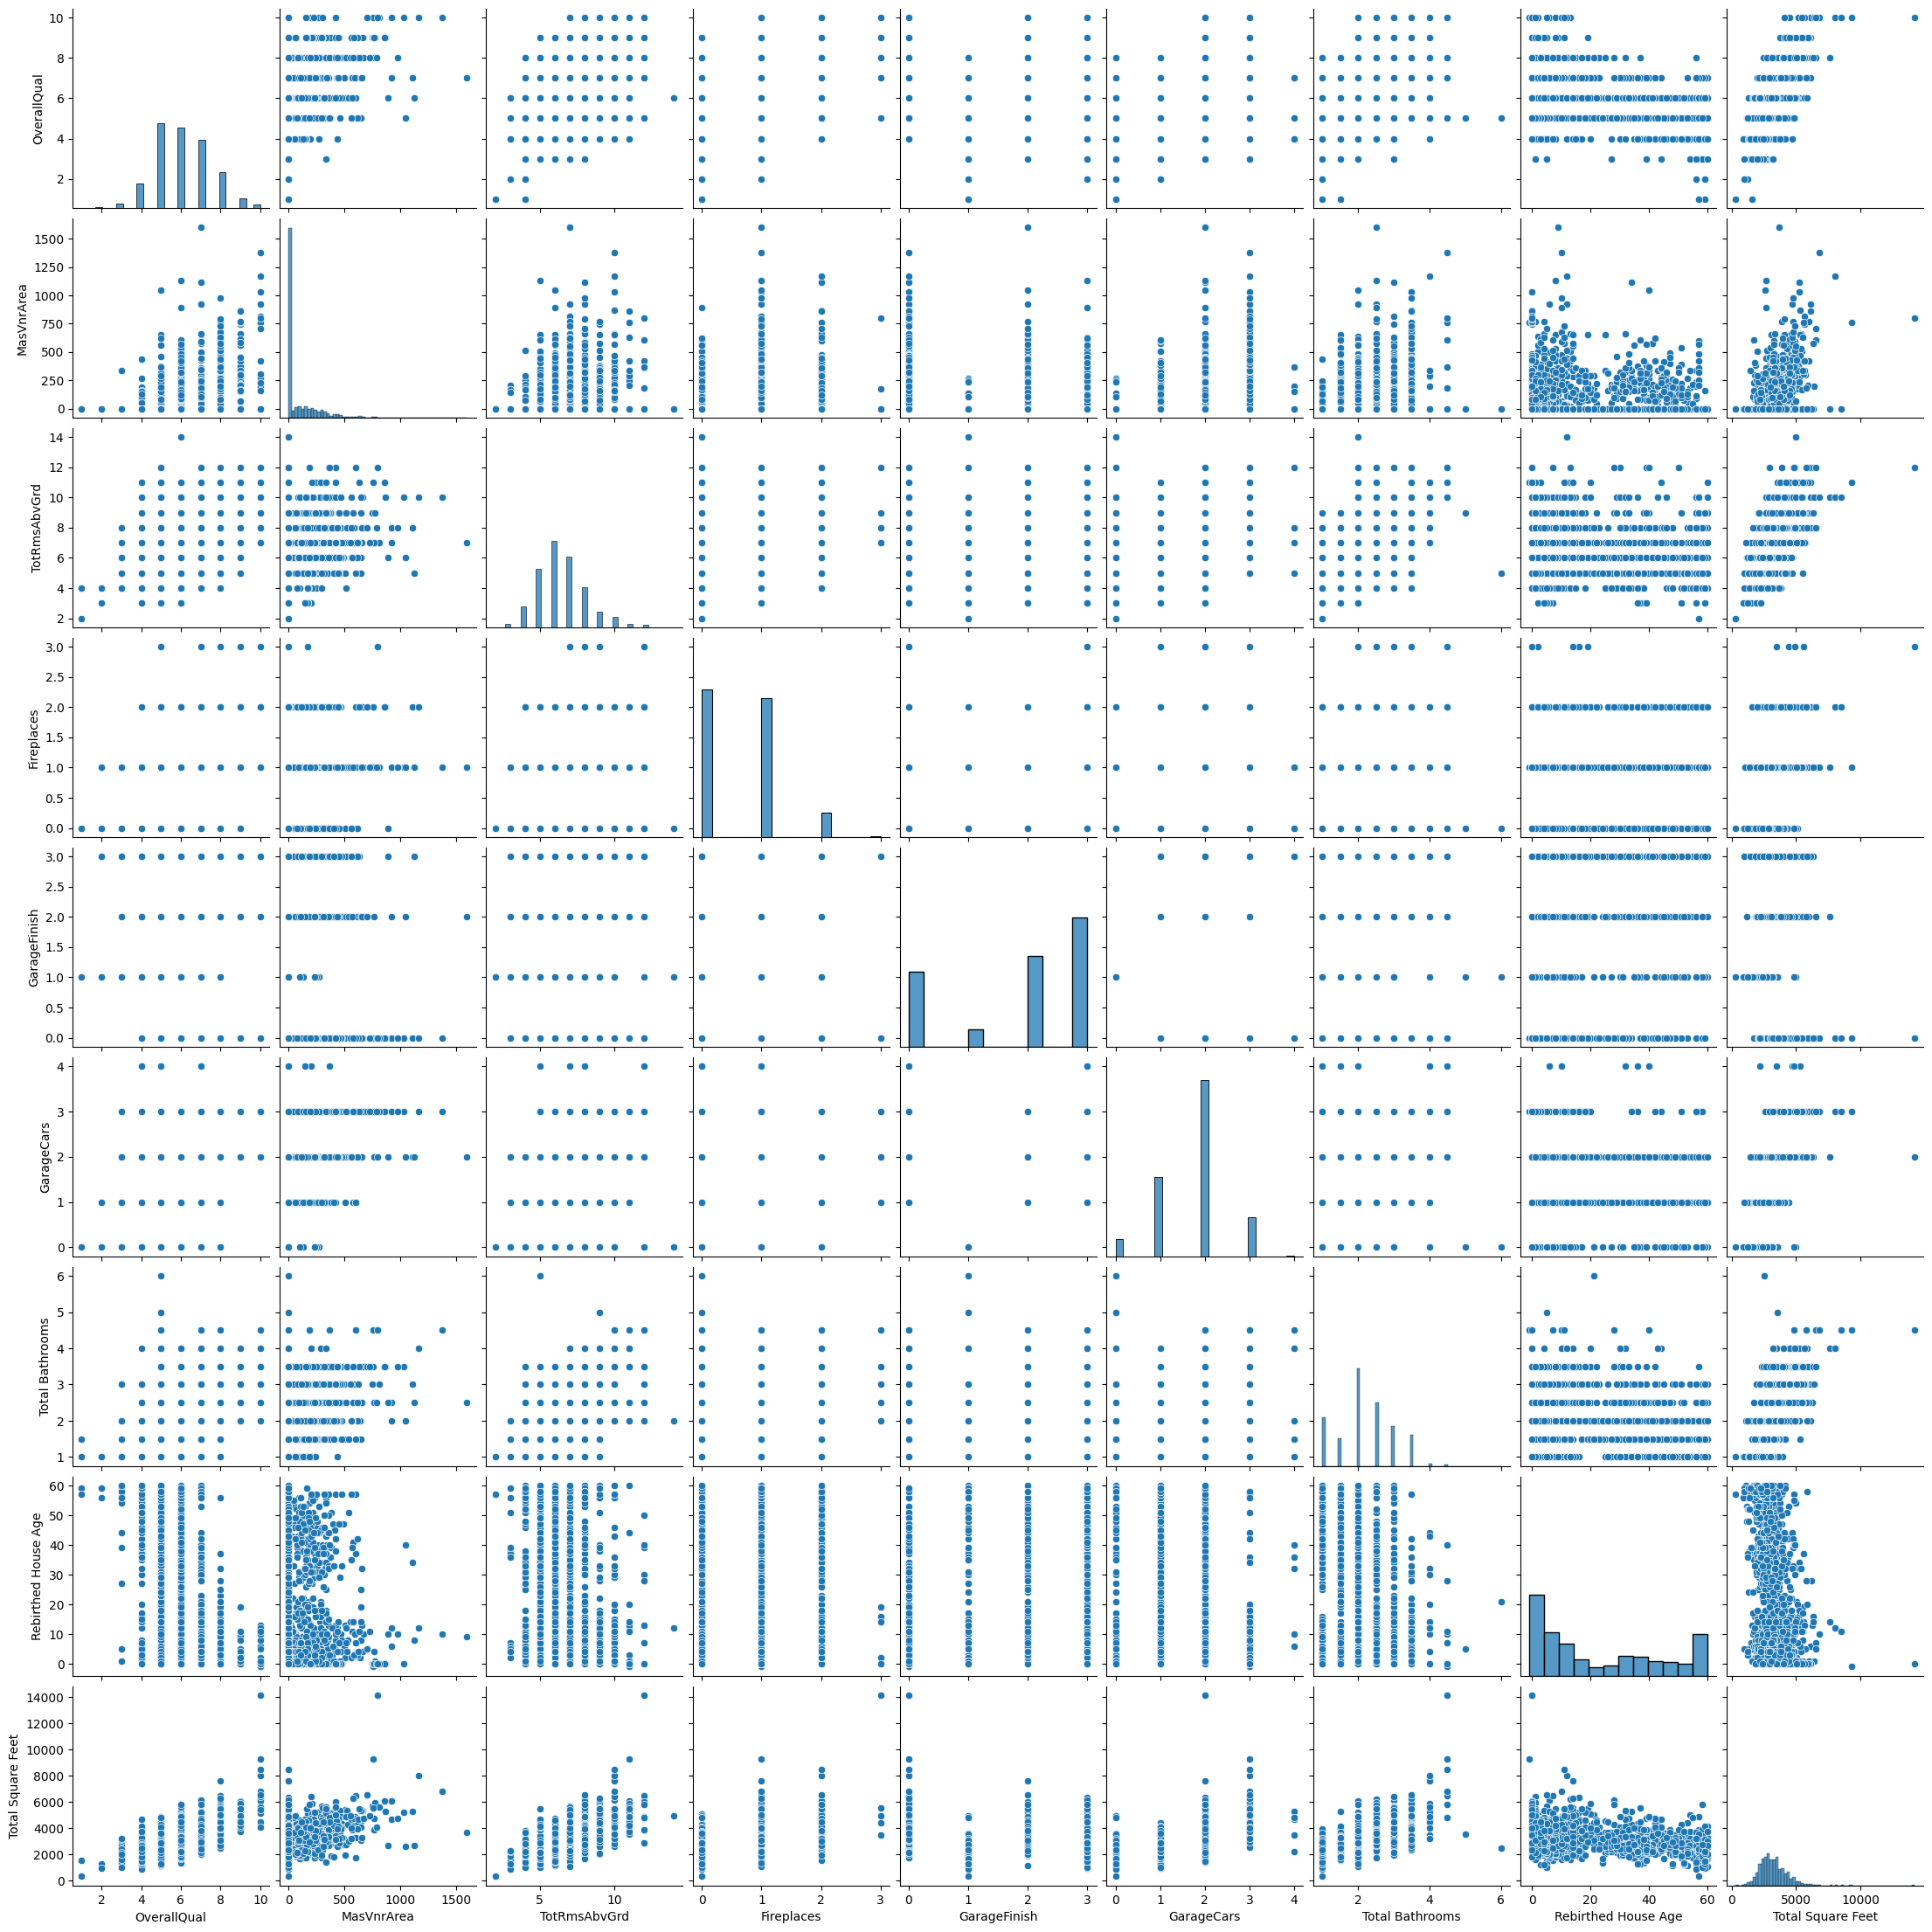

In [98]:
sns.pairplot(X)

In [99]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm
from scipy import stats 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
results = est.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     601.5
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:12:46   Log-Likelihood:                -17409.
No. Observations:                1460   AIC:                         3.484e+04
Df Residuals:                    1450   BIC:                         3.489e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.141e+04   7